In [45]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

657

In [6]:
#import the requets library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=db1bbe417f9305121b331358b549863b


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | barcelona
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | pundaguitan
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | ko samui
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | key west
Processing Record 9 of Set 1 | beringovskiy
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | maneromango
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | zhangjiakou
Processing Record 18 of Set 1 | touros
Processing Record 19 of Set 1 | maragogi
Processing Record 20 of Set 1 | tomatlan
Processing Record 21 of Set 1 | taoudenni
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Set 1 | ogembo
Processing Record 24 of Set 1 | port blair
Processing Record 25

Processing Record 41 of Set 4 | greenwood
Processing Record 42 of Set 4 | tarudant
City not found. Skipping...
Processing Record 43 of Set 4 | loiza
Processing Record 44 of Set 4 | andra
Processing Record 45 of Set 4 | yenagoa
Processing Record 46 of Set 4 | abu dhabi
Processing Record 47 of Set 4 | nizwa
Processing Record 48 of Set 4 | asau
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | mrirt
City not found. Skipping...
Processing Record 1 of Set 5 | didao
Processing Record 2 of Set 5 | daru
Processing Record 3 of Set 5 | naze
Processing Record 4 of Set 5 | palmer
Processing Record 5 of Set 5 | ketchikan
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | lagos
Processing Record 8 of Set 5 | ilulissat
Processing Record 9 of Set 5 | nogales
Processing Record 10 of Set 5 | houma
Processing Record 11 of Set 5 | vostok
Processing Record 12 of Set 5 | bluff
Processing Record 13 of Set 5 | sao joao da barra
Processing Record 14 of Set 5 | constitu

Processing Record 31 of Set 8 | constantine
Processing Record 32 of Set 8 | carutapera
Processing Record 33 of Set 8 | ust-kulom
Processing Record 34 of Set 8 | nioro
Processing Record 35 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | uruzgan
Processing Record 38 of Set 8 | moron
Processing Record 39 of Set 8 | hithadhoo
Processing Record 40 of Set 8 | biak
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | valdivia
Processing Record 43 of Set 8 | amapa
City not found. Skipping...
Processing Record 44 of Set 8 | kambove
Processing Record 45 of Set 8 | pangody
Processing Record 46 of Set 8 | mantua
Processing Record 47 of Set 8 | novyy urgal
Processing Record 48 of Set 8 | hambantota
Processing Record 49 of Set 8 | shimanovsk
Processing Record 50 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 1 of Set 9 | los llanos de aridane
Processing Record 2 of Set 9 |

Processing Record 18 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 19 of Set 12 | tecoanapa
Processing Record 20 of Set 12 | coquimbo
Processing Record 21 of Set 12 | sao miguel do araguaia
Processing Record 22 of Set 12 | krasnoselkup
Processing Record 23 of Set 12 | diebougou
Processing Record 24 of Set 12 | havre-saint-pierre
Processing Record 25 of Set 12 | neuquen
Processing Record 26 of Set 12 | port hardy
Processing Record 27 of Set 12 | piste
Processing Record 28 of Set 12 | gari
Processing Record 29 of Set 12 | dinsor
City not found. Skipping...
Processing Record 30 of Set 12 | ust-shonosha
Processing Record 31 of Set 12 | atambua
Processing Record 32 of Set 12 | buenos aires
Processing Record 33 of Set 12 | namibe
Processing Record 34 of Set 12 | rio brilhante
Processing Record 35 of Set 12 | baykit
Processing Record 36 of Set 12 | zaykovo
Processing Record 37 of Set 12 | san jose
Processing Record 38 of Set 12 | bloomfield
Processing Record 39 of Set 12

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,53.01,76,75,16.11,AU,2020-05-24 03:51:43
1,Barcelona,41.39,2.16,69.01,82,20,3.36,ES,2020-05-24 03:58:24
2,Tura,25.52,90.22,80.71,86,13,6.22,IN,2020-05-24 03:56:59
3,Pundaguitan,6.37,126.17,84.13,77,48,10.94,PH,2020-05-24 03:56:26
4,Vaini,-21.20,-175.20,77.00,78,75,8.05,TO,2020-05-24 03:56:08
5,Ko Samui,9.54,99.94,91.40,66,20,4.70,TH,2020-05-24 03:58:24
6,Qaanaaq,77.48,-69.36,21.94,90,0,2.98,GL,2020-05-24 03:56:04
7,Key West,24.56,-81.78,82.40,74,40,11.41,US,2020-05-24 03:54:02
8,Beringovskiy,63.05,179.32,32.49,96,95,12.80,RU,2020-05-24 03:57:09
9,Vardo,70.37,31.11,43.39,73,42,17.16,NO,2020-05-24 03:54:29


In [11]:
#Correct the column order.
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed',]

city_data_df=city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-05-24 03:51:43,-42.88,147.33,53.01,76,75,16.11
1,Barcelona,ES,2020-05-24 03:58:24,41.39,2.16,69.01,82,20,3.36
2,Tura,IN,2020-05-24 03:56:59,25.52,90.22,80.71,86,13,6.22
3,Pundaguitan,PH,2020-05-24 03:56:26,6.37,126.17,84.13,77,48,10.94
4,Vaini,TO,2020-05-24 03:56:08,-21.20,-175.20,77.00,78,75,8.05
...,...,...,...,...,...,...,...,...,...
598,Buala,SB,2020-05-24 03:59:42,-8.14,159.59,84.94,70,93,0.72
599,Arklow,IE,2020-05-24 03:59:42,52.79,-6.14,51.01,88,100,4.00
600,Kano,NG,2020-05-24 03:59:42,12.00,8.52,78.80,69,40,8.05
601,Chilca,PE,2020-05-24 03:59:42,-12.52,-76.74,62.60,88,90,2.24


In [12]:
# Create the output file.csv.
output_data_file= "weather_data/cities.csv"

#Export the city data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# EPlot Latitude vs. Temperature

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats=city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1590292782.6627235

In [15]:
today=time.strftime('%x')
today

'05/23/20'

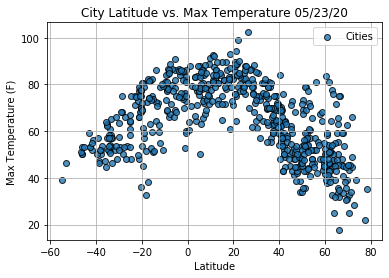

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

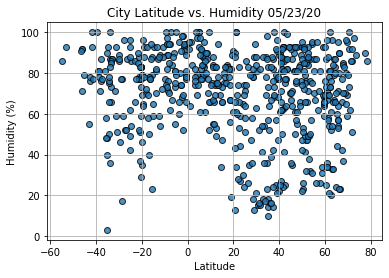

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

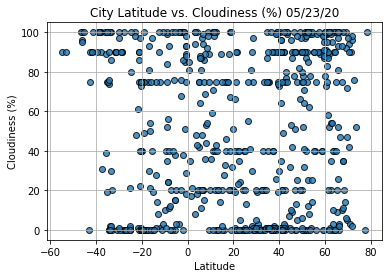

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

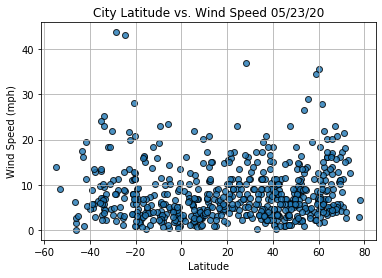

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [61]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]

index13

City                   Georgetown
Country                        MY
Date          2020-05-24 03:52:58
Lat                          5.41
Lng                        100.34
Max Temp                     87.8
Humidity                       79
Cloudiness                     20
Wind Speed                   1.12
Name: 13, dtype: object

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Barcelona,ES,2020-05-24 03:58:24,41.39,2.16,69.01,82,20,3.36
2,Tura,IN,2020-05-24 03:56:59,25.52,90.22,80.71,86,13,6.22
3,Pundaguitan,PH,2020-05-24 03:56:26,6.37,126.17,84.13,77,48,10.94
5,Ko Samui,TH,2020-05-24 03:58:24,9.54,99.94,91.40,66,20,4.70
6,Qaanaaq,GL,2020-05-24 03:56:04,77.48,-69.36,21.94,90,0,2.98


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

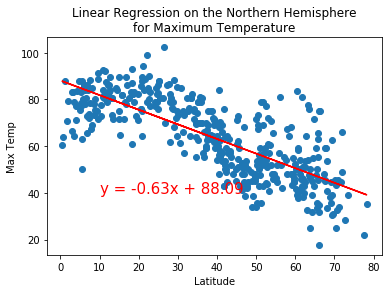

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))



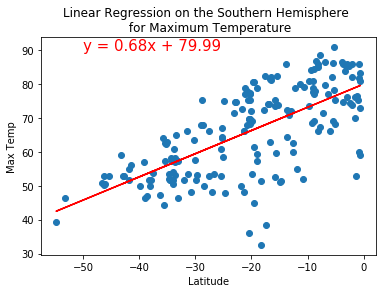

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


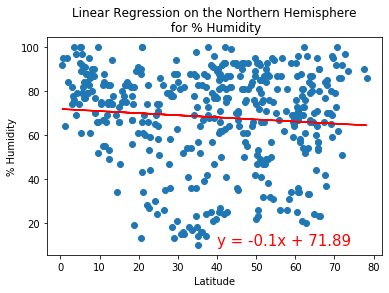

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

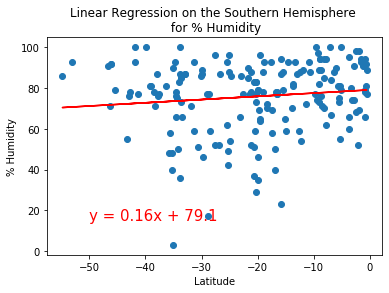

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

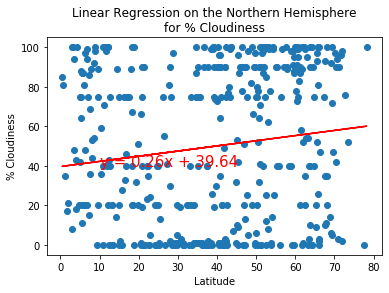

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(10,40))



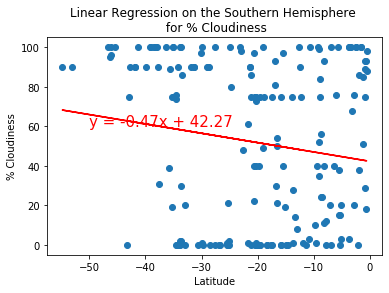

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

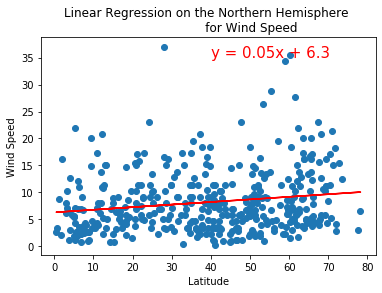

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

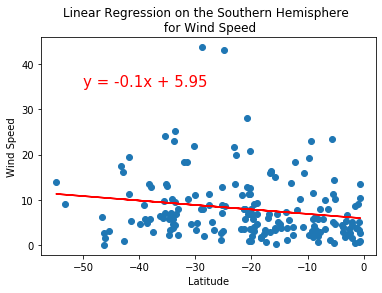

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))